In [1]:
import xarray as xr
import seaborn as sns

# Analyze Trial-Level Performancem

In [18]:
dset = xr.load_dataset("data/steinmetz_2017-01-11_Radnitz.nc")
dset

<xarray.Dataset>
Dimensions:             (trial: 252, time: 250, cell: 549, waveform_component: 3, sample: 82, probe: 384, brain_area_lfp: 11, spike_id: 2365035)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 247 248 249 250 251 252
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 544 545 546 547 548 549
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'MRN' 'RSP' ... 'POL' 'RSP'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2365033 2365034 2365035
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 0 0 0 0 0 0 100 0 ... 0 100 0 0 100 100 0
    contrast_right      (trial) int8 100 50 0 100 0 50 ... 50 50 100 25 100 100
    gocue               (trial) float64 0.7544 1.186 0.8188 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.668 2.358 1.836 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... 0....
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 8.479 ... 14.26
    spike_time          (spike_id) float32 0.9774 1.01 2.06 ... 1.121 1.143
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 549 549 549 549 549
    spike_trial         (spike_id) uint32 1 1 1 1 1 7 ... 243 247 247 249 249
Attributes:
    session_date:  2017-01-11
    mouse:         Radnitz
    stim_onset:    0.5
    bin_size:      0.01

### Filter out un-active Trials

In [19]:
dset["active_trials"]

<xarray.DataArray 'active_trials' (trial: 252)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])
Coordinates:
  * trial    (trial) int32 1 2 3 4 5 6 7 8 9 ... 245 246 247 248 249 250 251 252

In [20]:
df = (
    dset
    .sel(trial=dset.trial[dset.active_trials == True])
    [[
        "contrast_left",
        "contrast_right",
        "feedback_type",
        "feedback_time",
        "response_type",
        "response_time",
        "reaction_type",
        "reaction_time",
        "prev_reward",
        "gocue",
        "stim_onset"
    ]]
    .to_dataframe()
    )
df

,contrast_left,contrast_right,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time,prev_reward,gocue,stim_onset
trial,,,,,,,,,,,
1,0,100,1.0,1.272414,-1.0,1.233626,-1.0,990.0,-10.000000,0.754409,0.5
2,0,50,1.0,1.668419,-1.0,1.633170,-1.0,500.0,-6.099658,1.186013,0.5
3,0,0,1.0,2.358427,0.0,2.327785,0.0,inf,-2.399276,0.818809,0.5
4,0,100,1.0,1.836421,-1.0,1.800523,1.0,280.0,-2.455471,1.115613,0.5
5,0,0,1.0,2.381627,0.0,2.350818,0.0,inf,-5.615562,0.844410,0.5
...,...,...,...,...,...,...,...,...,...,...,...
138,0,100,-1.0,2.352027,0.0,2.326019,1.0,1030.0,-2.544810,0.820409,0.5
139,0,100,-1.0,2.006823,0.0,1.991372,0.0,inf,-7.723696,0.486005,0.5
140,0,100,-1.0,2.416828,0.0,2.415647,0.0,inf,-2.340678,0.914010,0.5


# Analyze the data

In [21]:
(df
    [["contrast_left","contrast_right"]]
    .value_counts(normalize=True)
    .unstack()
    .round(2)
)

contrast_right,0,25,50,100
contrast_left,,,,
0,0.21,0.03,0.10,0.13
25,0.03,NaN,0.03,0.09
50,0.06,NaN,0.01,0.02
100,0.07,0.13,0.07,0.02


## Performance by Contrast Difference

In [22]:
df["contrast_diff"] = df.contrast_right - df.contrast_left
df

,contrast_left,contrast_right,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time,prev_reward,gocue,stim_onset,contrast_diff
trial,,,,,,,,,,,,
1,0,100,1.0,1.272414,-1.0,1.233626,-1.0,990.0,-10.000000,0.754409,0.5,100
2,0,50,1.0,1.668419,-1.0,1.633170,-1.0,500.0,-6.099658,1.186013,0.5,50
3,0,0,1.0,2.358427,0.0,2.327785,0.0,inf,-2.399276,0.818809,0.5,0
4,0,100,1.0,1.836421,-1.0,1.800523,1.0,280.0,-2.455471,1.115613,0.5,100
5,0,0,1.0,2.381627,0.0,2.350818,0.0,inf,-5.615562,0.844410,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,100,-1.0,2.352027,0.0,2.326019,1.0,1030.0,-2.544810,0.820409,0.5,100
139,0,100,-1.0,2.006823,0.0,1.991372,0.0,inf,-7.723696,0.486005,0.5,100
140,0,100,-1.0,2.416828,0.0,2.415647,0.0,inf,-2.340678,0.914010,0.5,100


In [23]:
df.response_type

trial
1     -1.0
2     -1.0
3      0.0
4     -1.0
5      0.0
      ... 
138    0.0
139    0.0
140    0.0
141    0.0
142    0.0
Name: response_type, Length: 142, dtype: float64

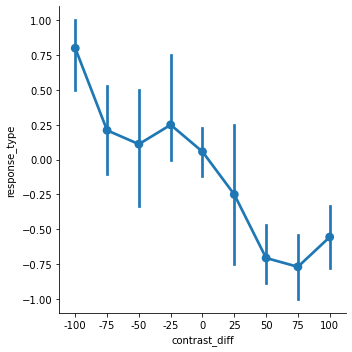

In [36]:
sns.catplot(data=df, x="contrast_diff", y="response_type", kind="point",)